In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
from sklearn.datasets import load_diabetes

In [3]:
dataset=load_diabetes()

In [4]:
print(dataset['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [5]:
df=pd.DataFrame(dataset.data, columns=[
    'age',
    'sex',
    'bmi',
    'bp',
    's1',
    's2',
    's3',
    's4',
    's5',
    's6',
])
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [6]:
X=df
y=dataset['target']

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
from sklearn.tree import DecisionTreeRegressor

In [9]:
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [10]:
param={
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error'],
    'splitter': ['best', 'random'],
    'max_depth': [1, 2, 3, 4, 5 ,10, 15, 20, 25],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [11]:
from sklearn.model_selection import GridSearchCV

In [12]:
grid=GridSearchCV(regressor, param_grid=param, cv=5, scoring='neg_mean_squared_error')

In [13]:
import warnings
warnings.filterwarnings('ignore')
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error'],
                         'max_depth': [1, 2, 3, 4, 5, 10, 15, 20, 25],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [14]:
grid.best_params_

{'criterion': 'squared_error',
 'max_depth': 3,
 'max_features': 'auto',
 'splitter': 'random'}

In [15]:
y_pred=grid.predict(X_test)

In [16]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [17]:
print(r2_score(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.3478971379855873
48.39035129630095
3520.251941560425


In [18]:
selectedModel = DecisionTreeRegressor(criterion='friedman_mse',max_depth=2,max_features='log2',
splitter='best')

In [19]:
selectedModel.fit(X_train, y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=2,
                      max_features='log2')

[Text(0.5, 0.8333333333333334, 'x[3] <= 0.024\nfriedman_mse = 6148.282\nsamples = 309\nvalue = 153.903'),
 Text(0.25, 0.5, 'x[2] <= -0.007\nfriedman_mse = 4588.551\nsamples = 213\nvalue = 130.667'),
 Text(0.125, 0.16666666666666666, 'friedman_mse = 2348.166\nsamples = 124\nvalue = 102.556'),
 Text(0.375, 0.16666666666666666, 'friedman_mse = 5075.174\nsamples = 89\nvalue = 169.831'),
 Text(0.75, 0.5, 'x[2] <= 0.022\nfriedman_mse = 5753.019\nsamples = 96\nvalue = 205.458'),
 Text(0.625, 0.16666666666666666, 'friedman_mse = 5020.022\nsamples = 49\nvalue = 162.755'),
 Text(0.875, 0.16666666666666666, 'friedman_mse = 2633.978\nsamples = 47\nvalue = 249.979')]

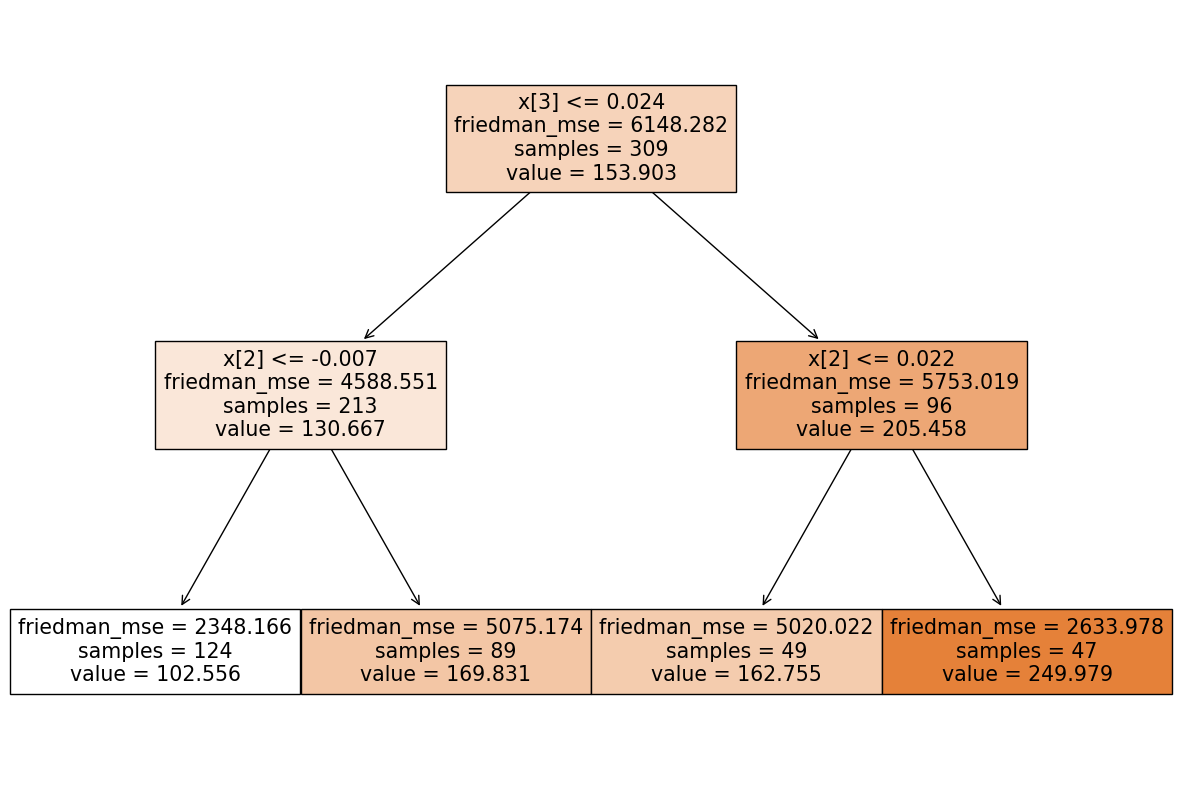

In [20]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(selectedModel, filled=True)